In [1]:
from torchzero.optim import RandomWalk
from image_descent import ImageDescent, FunctionDescent2D, surfaces

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# 1st order vanilla random walk
Tries `best_of` random directions, steps in the best one, or, if `move_opposite` is True and no directions decreased the loss, steps opposite of the worst direction.

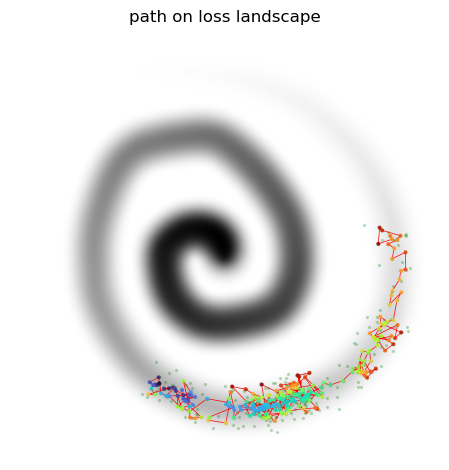

In [2]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=4e-2, order = 1, best_of = 1, move_opposite=True, propagate_opposite=False)
for i in range(250):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

# 2st order vanilla random walk
This now randomly changes the movement direction. For higher order random walks, setting `best_of` to 2 seems to help significantly.

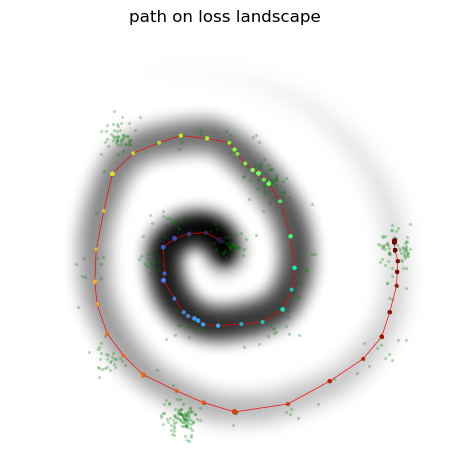

In [38]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=4e-2, best_of = 2, order = 2, move_opposite=False)
for i in range(250):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

# 3st order vanilla random walk
Randomly changes the acceleration direction, then undoes the change if loss increases. This quickly accelerates down convex functions, but won't do well on a spiral

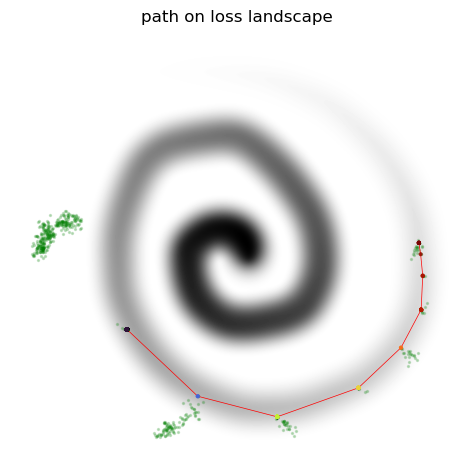

In [41]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=1e-2, order = 3, best_of = 2, move_opposite=True, propagate_opposite=False)
for i in range(250):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

# 10th order vanilla random walk
10th order direction is very unstable, especially for a spiral which has too many flat areas. Realistically you won't use anything higher than 4th order.

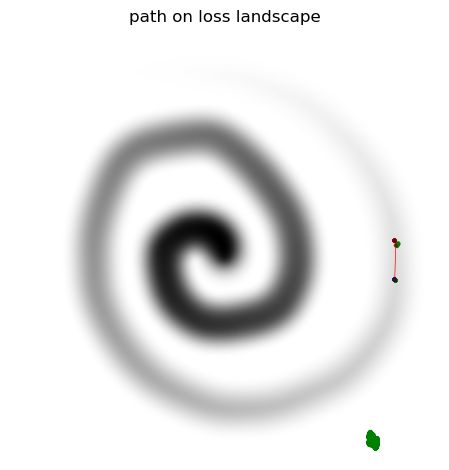

In [30]:
descent = ImageDescent(image, coords=(915, 500))

optimizer = RandomWalk(descent.parameters(), lr=1e-3, order = 10, best_of = 10, move_opposite=True, propagate_opposite=False)
for i in range(2000):
    print(i, end='\r')
    optimizer.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()

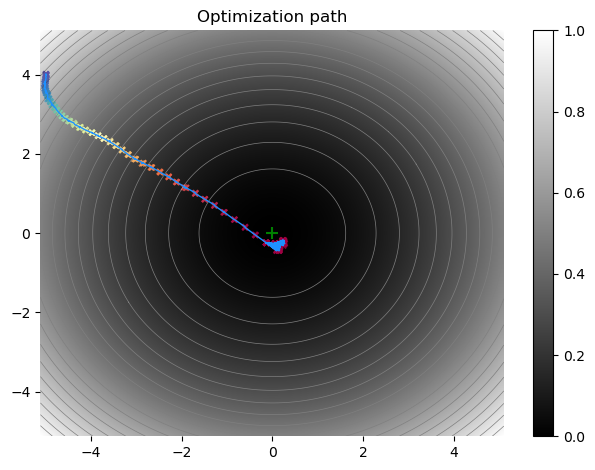

In [26]:
descent = FunctionDescent2D(surfaces.sphere)

optimizer = RandomWalk(descent.parameters(), lr=1e-2, best_of= 2, order = 2, move_opposite=True)
for i in range(100):
    print(i, end='\r')
    optimizer.step(descent.step)
descent.plot_path()

High order random walk can converge close to the minimum very quickly on highly convex surfaces, but have trouble steering themselves. That is why variable order random walk may be preferable.

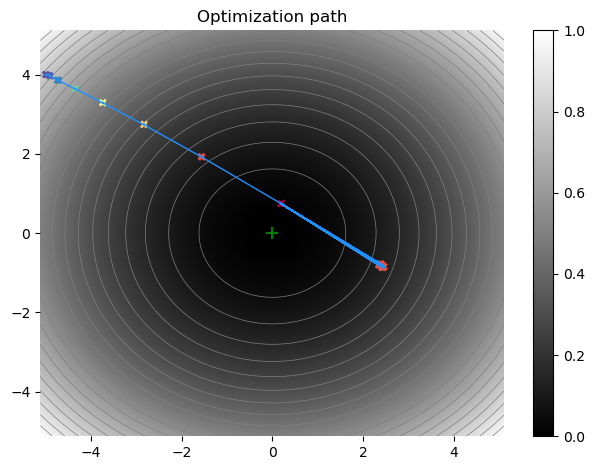

In [29]:
descent = FunctionDescent2D(surfaces.sphere)

optimizer = RandomWalk(descent.parameters(), lr=1e-2, best_of= 4, order = 4, move_opposite=True)
for i in range(20):
    print(i, end='\r')
    optimizer.step(descent.step)
descent.plot_path()